## Import Lib

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)
plt.rcParams["figure.figsize"] = [15,8]

## Taxi Trip Fare Prediction Challenge (Taken from MachineHack)

Through a real-world challenge, this hackathon aims to enhance competitors' data science and innovative analytical thinking abilities. Get an opportunity to work on a remarkable data science technology by competing with the best brains in this area at this point in time, where artificial intelligence and machine learning are at the forefront of attention, and find out how you stack up!

**This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.**

Overall, it involves using a dataset, finding the best set of features from the dataset, building a machine learning model to predict trip fare based on other trip features and evaluating the predictions using mean squared error and finally submitting the predictions in the given template.

## Data description:

* Trip_distance: The elapsed trip distance in miles reported by the taximeter.
Rate_code: The final rate code is in effect at the end of the trip. 1= Standard rate,2=JFK,3=Newark, 4=Nassau or Westchester, 5=Negotiated fare,6=Group ride
* Storeandfwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending it to the vendor and determines if the trip was stored in the server and forwarded to the vendor. Y= store and forward trip N= not a store and forward trip
* Payment_type: A numeric code signifying how the passenger paid for the trip. 1= Credit card,2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip
* Fare_amount: The time-and-distance fare calculated by the meter
* Extra: Miscellaneous extras and surcharges.
* Mta_tax:$0.50 MTA tax that is automatically triggered based on the metered rate in use.
* Tip_amount: Tip amount credited to the driver for credit card transactions.
* Tolls_amount: Total amount of all tolls paid in the trip.
* Imp_surcharge: $0.30 extra charges added automatically to all rides
* Total_amount: The total amount charged to passengers. Does not include cash tips
* Pickuplocationid: TLC Taxi Zone in which the taximeter was engaged
* Dropofflocationid: TLC Taxi Zone in which the taximeter was disengaged
* Year: The year in which the taxi trip was taken.
* Month: The month on which the taxi trip was taken.
* Day: The day on which the taxi trip was taken.
* Day_of_week: The day of the week on which the taxi trip was taken
* Hour_of_day: Used to determine the hour of the day in 24 hours format
* Trip_duration: The total duration of the trip in seconds
* calculated_total_amount: The total amount the customer has to pay for the taxi.

## Load the dataset

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.shape, test.shape

((35000, 20), (15000, 19))

In [9]:
train.head(5)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [8]:
test.head(5)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration
0,15.70,1,N,2,45.0,0.0,0.5,0.00,0.00,0.3,45.80,132,146,2018,10,20,5,16,3967.0
1,7.30,1,N,1,25.5,0.0,0.5,7.89,0.00,0.3,34.19,186,69,2018,2,24,5,15,1491.0
2,14.87,1,N,1,40.5,0.5,0.5,8.36,0.00,0.3,50.16,138,89,2018,9,11,1,22,1395.0
3,2.90,1,N,2,22.0,0.0,0.5,0.00,0.00,0.3,22.80,90,162,2018,6,7,3,11,1742.0
4,8.96,1,N,1,32.0,0.0,0.5,0.00,5.76,0.3,38.56,138,186,2018,4,20,4,10,1623.0


## Univariate Analysis

In [11]:
combined = pd.concat([train, test], ignore_index = True)

In [12]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [13]:
combined.select_dtypes(include = np.number).columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

In [19]:
print(combined.rate_code.unique())
print(combined.mta_tax.unique())
print(combined.payment_type.unique())
print(combined.imp_surcharge.unque())

[1 3 5 4 2]
[0.5 0. ]
[1 2 3 4]
[0.3 0. ]


In [20]:
## Converting above variables in Object

combined["imp_surcharge"] = combined.imp_surcharge.astype("object")
combined["mta_tax"] = combined.mta_tax.astype("object")
combined["payment_type"] = combined.payment_type.astype("object")
combined["rate_code"] = combined.rate_code.astype("object")

In [22]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [23]:
combined.dtypes

trip_distance              float64
rate_code                   object
store_and_fwd_flag          object
payment_type                object
fare_amount                float64
extra                      float64
mta_tax                     object
tip_amount                 float64
tolls_amount               float64
imp_surcharge               object
total_amount               float64
pickup_location_id           int64
dropoff_location_id          int64
year                         int64
month                        int64
day                          int64
day_of_week                  int64
hour_of_day                  int64
trip_duration              float64
calculated_total_amount    float64
dtype: object

In [24]:
combined.select_dtypes(include = np.number).columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'pickup_location_id', 'dropoff_location_id', 'year',
       'month', 'day', 'day_of_week', 'hour_of_day', 'trip_duration',
       'calculated_total_amount'],
      dtype='object')

## Univaraiate Analysis

## Numerical Variables

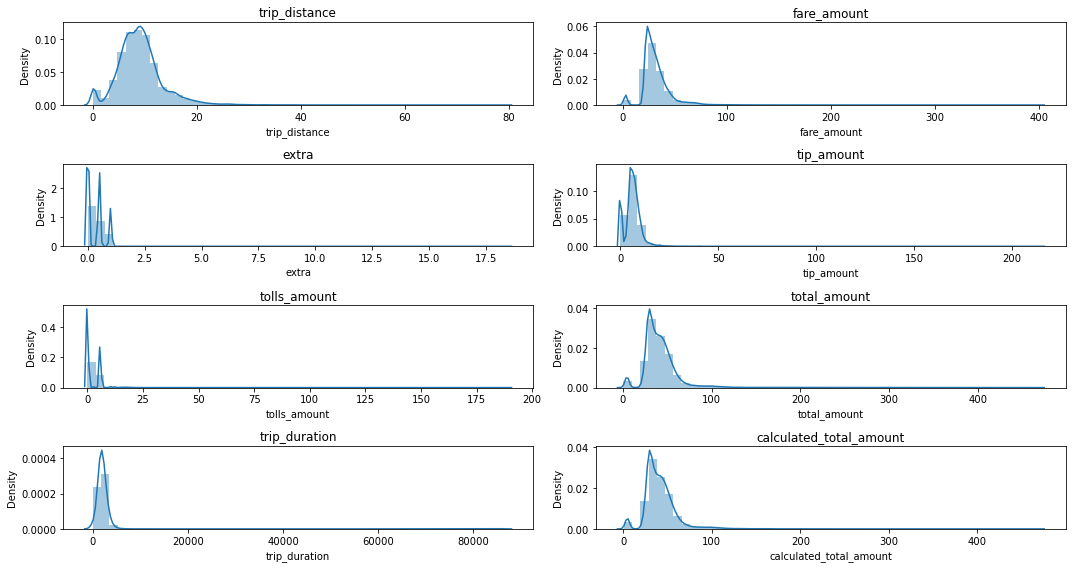

In [34]:
num_cols = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 
            'total_amount', 'trip_duration','calculated_total_amount']

nrows = 4
ncols = 2
repeater = 1

for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.distplot(combined.loc[:,i].dropna())
    plt.title(i)
    repeater += 1
    
plt.tight_layout()
plt.show()

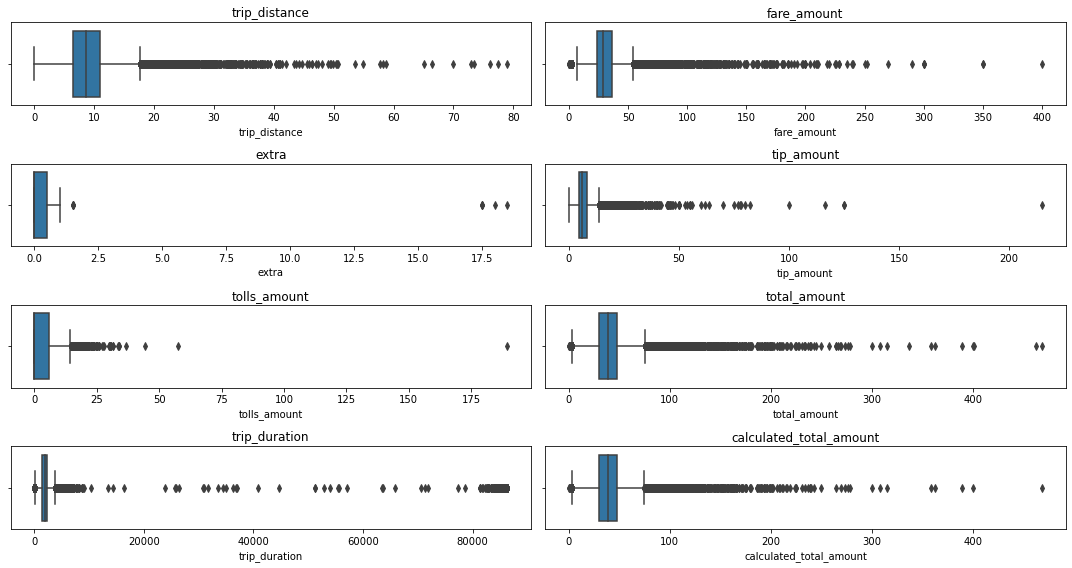

In [48]:
nrows = 4
ncols = 2
repeater = 1

for i in num_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.boxplot(combined.loc[:,i].dropna())
    plt.title(i)
    repeater += 1
    
plt.tight_layout()
plt.show()

## Inference:-

* All the Numerical variable are positive Skewed

## Categorical Variables

In [30]:
combined.select_dtypes(include = "object").columns

Index(['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge'],
      dtype='object')

In [31]:
combined.head(2)

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.3
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.4


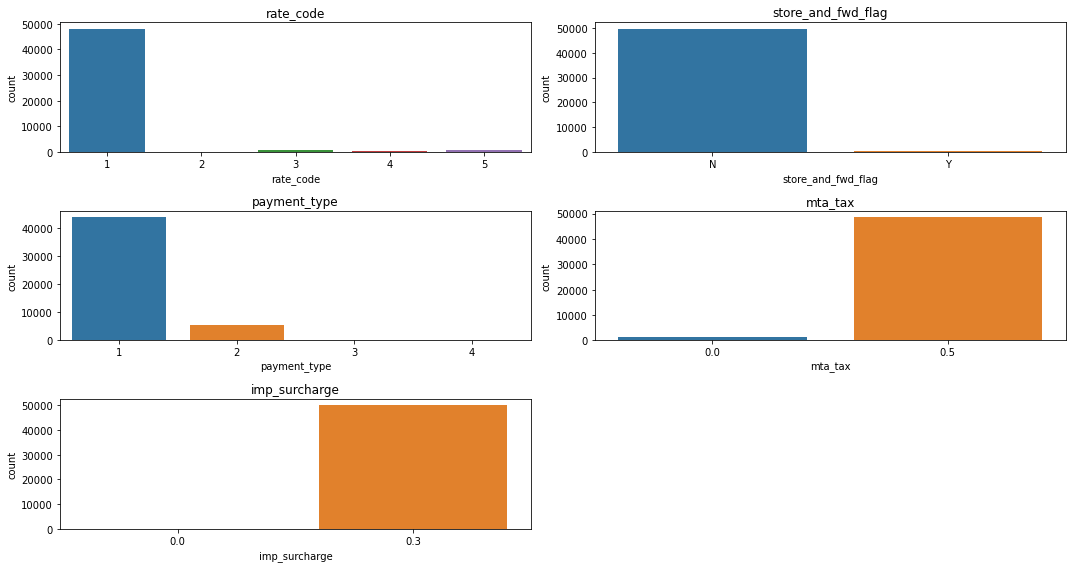

In [38]:
cat_cols = ['rate_code', 'store_and_fwd_flag', 'payment_type', 'mta_tax',
       'imp_surcharge']

nrows = 3
ncols = 2
iterator = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined[i])
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

## Bi-Variate Analysis

## 1. Numerical vs Target

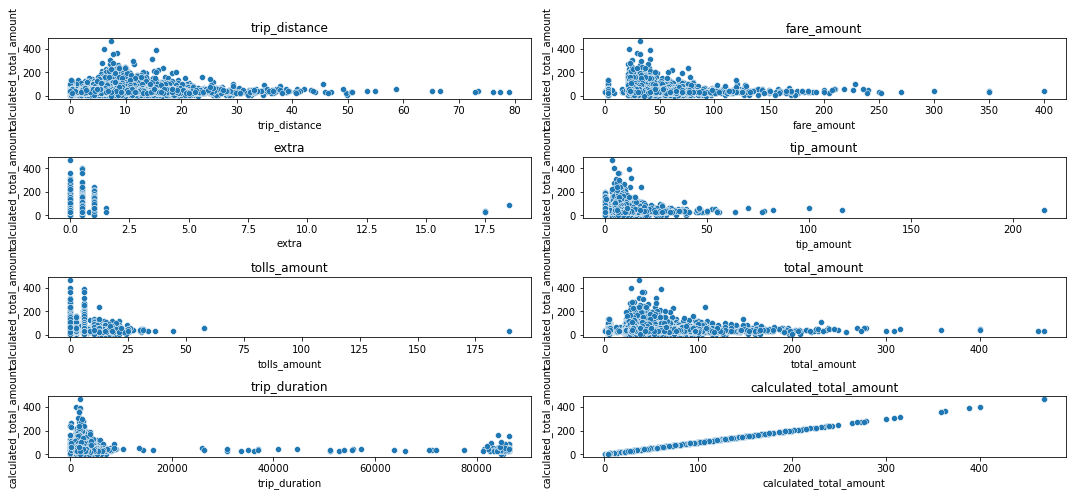

In [43]:
nrows = 5
ncols = 2
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(combined.loc[:,i].dropna(),combined.calculated_total_amount)
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

## Bi-Variate Analysis

## 2. Categorical vs Numerical

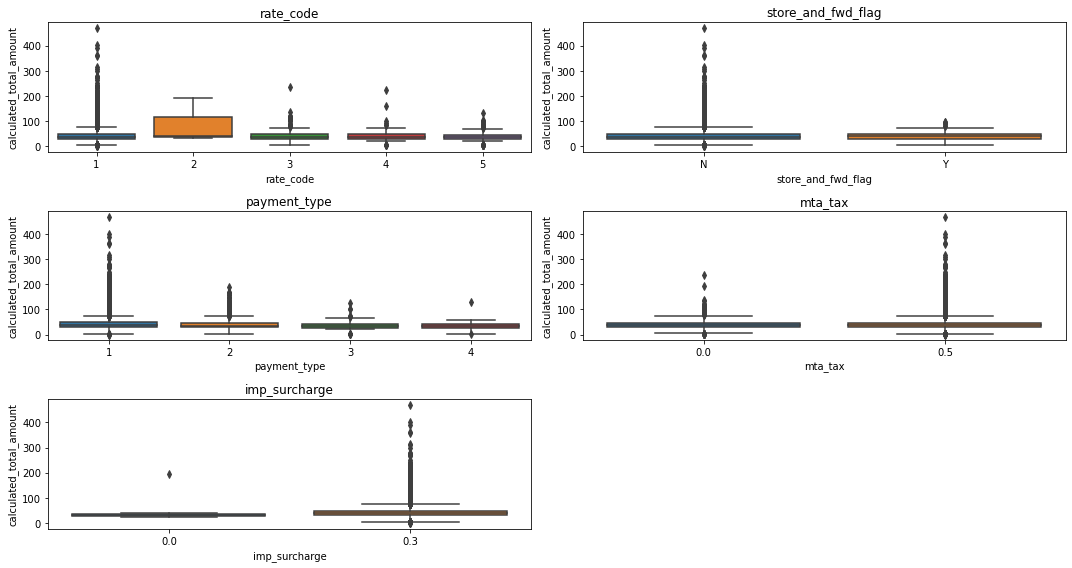

In [47]:
nrows = 3
ncols = 2
iterator = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(x = combined.loc[:,i],
                y = combined.calculated_total_amount)
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

## Missing Values

In [52]:
combined.isnull().sum()

trip_distance                  0
rate_code                      0
store_and_fwd_flag             0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
imp_surcharge                  0
total_amount                   0
pickup_location_id             0
dropoff_location_id            0
year                           0
month                          0
day                            0
day_of_week                    0
hour_of_day                    0
trip_duration                  0
calculated_total_amount    15000
dtype: int64

## Bi- Varaiate Analysis

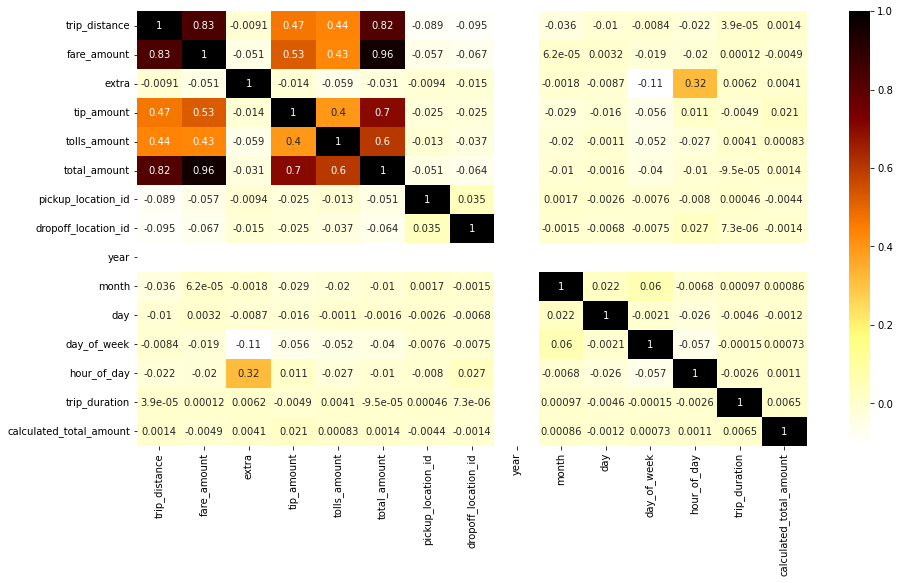

In [63]:
sns.heatmap(combined.corr(), annot=True, cmap = "afmhot_r")
plt.show()

## Feature Engineering

In [65]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount'],
      dtype='object')

<AxesSubplot:xlabel='hour_of_day', ylabel='calculated_total_amount'>

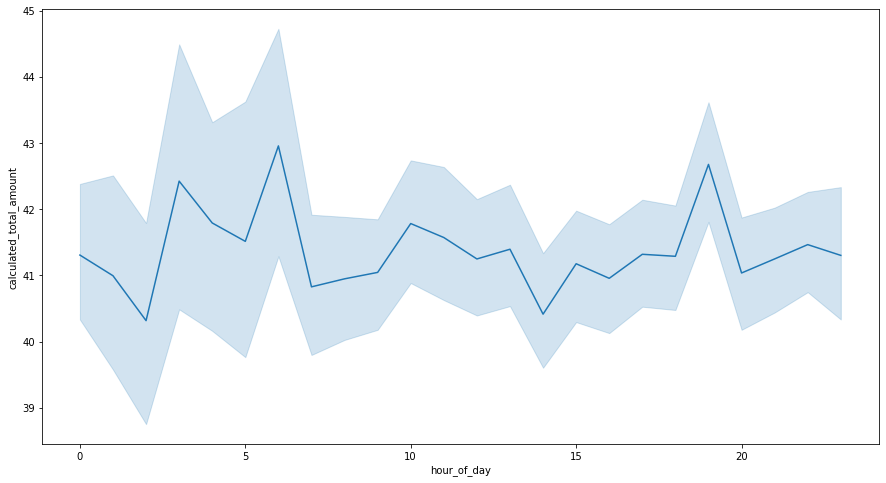

In [68]:
sns.lineplot(combined["hour_of_day"],combined["calculated_total_amount"])

* Rush Hours

In [74]:
combined["Rush Hours"] = combined.hour_of_day.apply(lambda x:1 if x in [6, 10, 15, 16, 17, 18, 19, 20] else 0)

In [78]:
combined.drop("Rus Hours", axis=1, inplace=True)

In [79]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush Hours
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,1
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0


**Rush Hour vs Target**

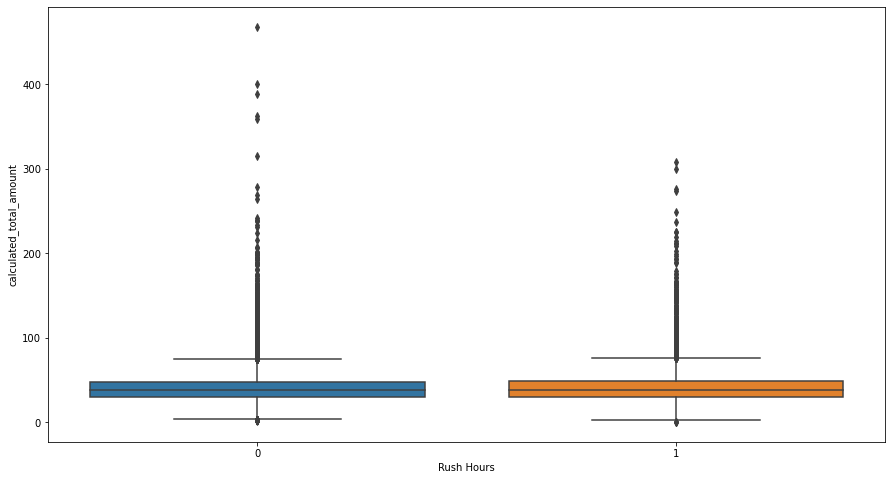

In [80]:
sns.boxplot(x = "Rush Hours", y = "calculated_total_amount", data = combined)
plt.show()

**Rush month vs Target**

<AxesSubplot:xlabel='month', ylabel='calculated_total_amount'>

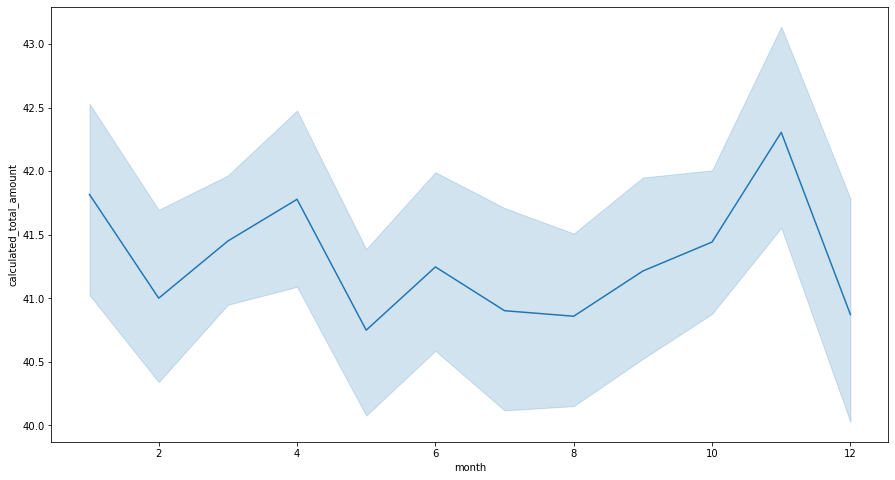

In [82]:
sns.lineplot(combined["month"],combined["calculated_total_amount"])

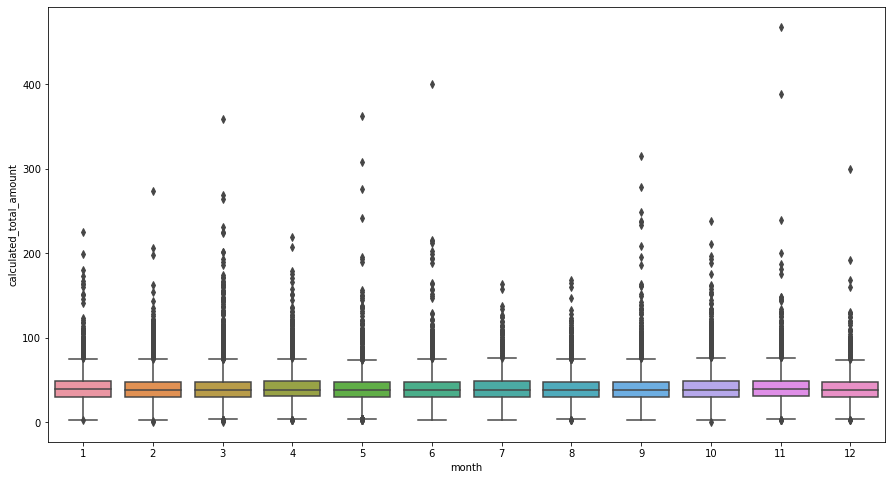

In [83]:
sns.boxplot(x = "month", y = "calculated_total_amount", data = combined)
plt.show()

In [88]:
from sklearn.cluster import KMeans

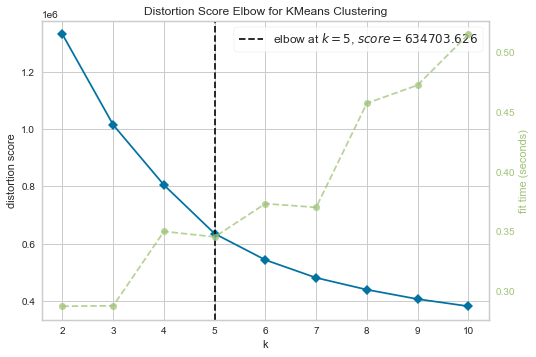

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans()

visualizer = KElbowVisualizer(estimator = kmeans, random_state=0)

data = combined.loc[:, ["day_of_week", "hour_of_day", "month"]]

visualizer.fit(data)
visualizer.show()

In [100]:
#n_cluster = 5

data = combined.loc[:, ["day_of_week","hour_of_day","month"]]

kmeans = KMeans(n_clusters = 5, random_state=0)

k = kmeans.fit(data)

combined["clusters"] = k.labels_

In [104]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush Hours,clusters
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,1,4
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40,1,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0,3


In [105]:
combined.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount', 'Rush Hours',
       'clusters'],
      dtype='object')

**Split the data in Train and Test**

In [108]:
newtrain = combined.loc[0:train.shape[0]-1, :]
newtest = combined.loc[train.shape[0]:, :]

In [109]:
newtrain.shape, newtest.shape

((35000, 22), (15000, 22))

**Drop the Target from Newtest**

In [111]:
newtest.drop("calculated_total_amount", axis = 1, inplace = True)

## Outlier Removal

In [114]:
q1 = newtrain.quantile(0.25)
q2 = newtrain.quantile(0.50)
q3 = newtrain.quantile(0.75)

IQR = q3 - q1

Upper_limit = q3+1.5*IQR
Lower_limit = q1-1.5*IQR

wt_outliers = newtrain.loc[~((newtrain<Lower_limit) | (newtrain>Upper_Limit)).any(axis=1)]
wt_outliers

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,Rush Hours,clusters
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30,1,4
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36,0,4
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30,1,3
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80,0,3
5,12.65,1,N,1,41.5,0.0,0.5,0.02,5.76,0.3,48.08,138,100,2018,1,8,0,7,2029.0,30.95,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34990,8.20,1,N,1,25.0,0.5,0.5,5.25,0.00,0.3,31.55,138,255,2018,3,25,6,20,1350.0,42.36,1,0
34991,7.40,1,Y,2,27.5,0.0,0.5,0.00,0.00,0.3,28.30,226,232,2018,10,19,4,7,2607.0,29.75,0,1
34993,4.40,1,N,1,23.5,0.0,0.5,4.85,0.00,0.3,29.15,162,41,2018,9,24,0,15,1710.0,43.87,1,1
34994,4.91,1,N,1,22.5,1.0,0.5,6.08,0.00,0.3,30.38,163,13,2018,6,26,1,16,1869.0,56.00,1,0


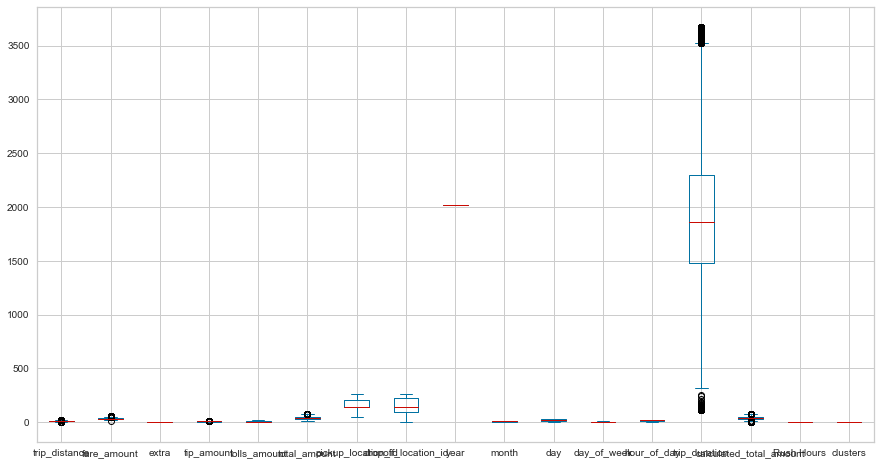

In [120]:
wt_outliers.plot(kind = "box")
plt.show()

## Min Max Scaler

**Drop the Insignificant Variables**

In [125]:
finaltrain = wt_outliers.drop(["calculated_total_amount", "year","pickup_location_id","dropoff_location_id"], axis=1)

finaltest = newtest.drop(["year","pickup_location_id","dropoff_location_id"], axis=1)

In [127]:
finaltrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26105 entries, 0 to 34997
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_distance       26105 non-null  float64
 1   rate_code           26105 non-null  object 
 2   store_and_fwd_flag  26105 non-null  object 
 3   payment_type        26105 non-null  object 
 4   fare_amount         26105 non-null  float64
 5   extra               26105 non-null  float64
 6   mta_tax             26105 non-null  object 
 7   tip_amount          26105 non-null  float64
 8   tolls_amount        26105 non-null  float64
 9   imp_surcharge       26105 non-null  object 
 10  total_amount        26105 non-null  float64
 11  month               26105 non-null  int64  
 12  day                 26105 non-null  int64  
 13  day_of_week         26105 non-null  int64  
 14  hour_of_day         26105 non-null  int64  
 15  trip_duration       26105 non-null  float64
 16  Rush

In [129]:
finaltrain.select_dtypes(include=np.number).columns

Index(['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'Rush Hours', 'clusters'],
      dtype='object')

In [133]:
## this is scaleable code
num_cols = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount',
       'total_amount', 'month', 'day', 'day_of_week', 'hour_of_day',
       'trip_duration', 'clusters']

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(-1, 1))

for i in num_cols:
    finaltrain.loc[:, i] = minmax.fit_transform(pd.DataFrame(finaltrain.loc[:, i]))
    finaltest.loc[:, i] = minmax.transform(pd.DataFrame(finaltest.loc[:, i]))

In [134]:
finaltrain

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,month,day,day_of_week,hour_of_day,trip_duration,Rush Hours,clusters
0,0.013529,1,N,1,-0.183932,-1.0,0.5,0.204142,-0.192146,0.3,-0.035101,-0.636364,-0.600000,-0.333333,-0.478261,0.133165,1,1.0
2,0.085682,1,N,1,0.471459,-1.0,0.5,0.421598,-0.192146,0.3,0.471845,-1.000000,0.866667,-1.000000,-0.304348,-0.340622,0,1.0
3,0.068771,1,N,1,-0.014799,0.0,0.5,0.368343,-0.192146,0.3,0.132487,0.454545,0.600000,-0.666667,0.739130,0.388281,1,0.5
4,-0.348365,1,N,1,-0.374207,0.0,0.5,-0.325444,-1.000000,0.3,-0.433607,0.272727,0.266667,-1.000000,0.826087,-0.178581,0,0.5
5,0.423901,1,N,1,0.471459,-1.0,0.5,-0.997041,-0.192146,0.3,0.185362,-1.000000,-0.533333,-1.000000,-0.391304,0.075974,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34990,-0.077790,1,N,1,-0.226216,0.0,0.5,-0.223373,-1.000000,0.3,-0.308439,-0.636364,0.600000,1.000000,0.739130,-0.304738,1,-1.0
34991,-0.167982,1,Y,2,-0.120507,-1.0,0.5,-1.000000,-1.000000,0.3,-0.405527,0.636364,0.200000,0.333333,-0.391304,0.400056,0,-0.5
34993,-0.506201,1,N,1,-0.289641,-1.0,0.5,-0.282544,-1.000000,0.3,-0.380134,0.454545,0.533333,-1.000000,0.304348,-0.102888,1,-0.5
34994,-0.448703,1,N,1,-0.331924,1.0,0.5,-0.100592,-1.000000,0.3,-0.343391,-0.090909,0.666667,-0.666667,0.391304,-0.013737,1,-1.0


**Dummy**

In [136]:
dummytrain = pd.get_dummies(finaltrain, drop_first=True)
dummytest = pd.get_dummies(finaltest, drop_first=True)

In [137]:
dummytrain.shape, dummytest.shape

((26105, 22), (15000, 23))

In [142]:
dummytest.head()

,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,month,day,day_of_week,hour_of_day,trip_duration,Rush Hours,clusters,rate_code_3,rate_code_4,rate_code_5,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,mta_tax_0.5,imp_surcharge_0.3
35000,0.767756,0.619450,-1.0,-1.000000,-1.000000,0.117252,0.636364,0.266667,0.666667,0.391304,1.162602,1,0.5,0,0,0,0,1,0,0,1,1
35001,-0.179256,-0.205074,-1.0,0.167160,-1.000000,-0.229574,-0.818182,0.533333,0.666667,0.304348,-0.225680,1,-1.0,0,0,0,0,0,0,0,1,1
35002,0.674183,0.429175,0.0,0.236686,-1.000000,0.247498,0.454545,-0.333333,-0.666667,0.913043,-0.279507,0,0.5,0,0,0,0,0,0,0,1,1
35003,-0.675310,-0.353066,-1.0,-1.000000,-1.000000,-0.569828,-0.090909,-0.600000,0.000000,-0.043478,-0.084945,0,1.0,0,0,0,0,1,0,0,1,1
35004,0.007892,0.069767,-1.0,-1.000000,-0.192146,-0.099029,-0.454545,0.266667,0.333333,-0.130435,-0.151668,1,1.0,0,0,0,0,0,0,0,1,1


**Rate_code_2**

In [139]:
dummytest.drop("rate_code_2", axis=1, inplace = True)
dummytest.shape

(15000, 22)

## Model building

In [ ]:
      Train / test
    
    Train -->  Validation -->  Test

## Linear Regression

In [145]:
y = wt_outliers.calculated_total_amount

**Training and Validation set to build the models**

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [237]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

lr = LinearRegression()
pred_train = []
pred_test =  []
rmse_train = []
rmse_test=[]

for train_index, test_index in kfold.split(dummytrain, y):
    xtrain = dummytrain.iloc[train_index]
    ytrain = y.iloc[train_index]
    xtest = dummytrain.iloc[test_index]      ## Validation set
    ytest = y.iloc[test_index]               ## Validation set
    
    pred_train = (lr.fit(xtrain, ytrain).predict(xtrain))
    pred_test = (lr.fit(xtrain, ytrain).predict(xtest))
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain, pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest, pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.36551935198674
12.376492810045997


## DecisionTreeRegressor

In [172]:
from sklearn.tree import DecisionTreeRegressor

In [173]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)

dt=DecisionTreeRegressor()

pred_train=[]
pred_test=[]

rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index] #validation set
    
    pred_train=(dt.fit(xtrain,ytrain).predict(xtrain))
    pred_test=(dt.fit(xtrain,ytrain).predict(xtest))
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

1.2043673868681282e-17
18.047599239817124


## Ridge

In [177]:
from sklearn.linear_model import Ridge

In [178]:
kfold=KFold(n_splits=5,shuffle=True,random_state=42)

rid = Ridge() 

pred_train=[]
pred_test=[]

rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index] #validation set
    
    pred_train=(rid.fit(xtrain,ytrain).predict(xtrain))
    pred_test=(rid.fit(xtrain,ytrain).predict(xtest))
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.365626202379445
12.375722209705504


## Lasso Regressor

In [180]:
from sklearn.linear_model import Lasso

In [181]:
kfold = KFold(n_splits=5,shuffle=True,random_state=42)

las = Lasso()

pred_train=[]
pred_test=[]

rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index] #validation set
    
    pred_train=(las.fit(xtrain,ytrain).predict(xtrain))
    pred_test=(las.fit(xtrain,ytrain).predict(xtest))
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.392158144315555
12.391967385912054


In [ ]:
###

## Random Forest

In [182]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [184]:
rf = RandomForestRegressor()
rmse_train = []
rmse_test = []

pred_train=[]
pred_test=[]

rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index] #validation set
    
    pred_train=(rf.fit(xtrain,ytrain).predict(xtrain))
    pred_test=(rf.fit(xtrain,ytrain).predict(xtest))
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

4.721845851498363
12.637091924798264


## Adaboost

In [187]:
ada = AdaBoostRegressor()
rmse_train = []
rmse_test = []

pred_train=[]
pred_test=[]

rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index] #validation set
    
    pred_train=(ada.fit(xtrain,ytrain).predict(xtrain))
    pred_test=(ada.fit(xtrain,ytrain).predict(xtest))
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.360515716714403
12.374707976791605


## Gradient Regressor

In [188]:
gbm = GradientBoostingRegressor()
rmse_train = []
rmse_test = []

pred_train=[]
pred_test=[]

rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index] #validation set
    
    pred_train=(gbm.fit(xtrain,ytrain).predict(xtrain))
    pred_test=(gbm.fit(xtrain,ytrain).predict(xtest))
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

12.200447831959028
12.385716912048569


In [193]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

## XGBRgressor

In [195]:
xgb = XGBRegressor()
rmse_train = []
rmse_test = []

pred_train=[]
pred_test=[]

rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index] #validation set
    
    pred_train=(xgb.fit(xtrain,ytrain).predict(xtrain))
    pred_test=(xgb.fit(xtrain,ytrain).predict(xtest))
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

10.028084396358583
12.809196716822948


## LGBMRegressor

In [196]:
lgb = LGBMRegressor()
rmse_train = []
rmse_test = []

pred_train=[]
pred_test=[]

rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index] #validation set
    
    pred_train=(lgb.fit(xtrain,ytrain).predict(xtrain))
    pred_test=(lgb.fit(xtrain,ytrain).predict(xtest))
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

11.549583122533907
12.43930930109095


## Parameters Tuning with XGBoosting

In [201]:
xgb = XGBRegressor(max_depth = 2, n_estimators = 49, reg_lambda = 1.6)

pred_train=[]
pred_test=[]

rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index] #validation set
    
    pred_train=(xgb.fit(xtrain,ytrain).predict(xtrain))
    pred_test=(xgb.fit(xtrain,ytrain).predict(xtest))
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

11.549583122533907
12.43930930109095


## Parameters Tuning with Random Forest

In [207]:
rf = RandomForestRegressor(min_samples_leaf=4, n_estimators = 500, random_state = 0)

pred_train=[]
pred_test=[]

rmse_train=[]
rmse_test=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    xtest=dummytrain.iloc[test_index] #validation set
    ytest=y.iloc[test_index] #validation set
    
    pred_train=(rf.fit(xtrain,ytrain).predict(xtrain))
    pred_test=(rf.fit(xtrain,ytrain).predict(xtest))
    
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_train)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_test)))
    
print(np.mean(rmse_train))
print(np.mean(rmse_test))

7.834234626133383
12.505159811250294


## Final Predictions

**Random Forest**

In [211]:
rf = RandomForestRegressor(min_samples_leaf=4, n_estimators = 500, random_state = 0)

pred=[]

for train_index,test_index in kfold.split(dummytrain,y):
    xtrain=dummytrain.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(dummytest))

In [230]:
pred = pd.DataFrame(pred).T.mean(axis=1)
pred.head()

0    39.156663
dtype: float64

In [221]:
sub["calculated_total_amount"] = pred

In [222]:
sub.to_csv("RF.csv", index = False)         ## RMSE - 19.66274

In [ ]:
## XGBoost

## Stacking Model

In [233]:
from sklearn.ensemble import StackingRegressor
pred=[]
base = [("lr", lr), ("gbm", gbm), ("xgb", xgb), ("lgb", lgb)]
final = RandomForestRegressor(n_estimators=500, min_samples_leaf=4, random_state=0)

stack = StackingRegressor(estimators=base, final_estimator=final, cv=5)

pred.append(stack.fit(dummytrain, y).predict(dummytest))
finalpred = pd.DataFrame(pred).T.mean(axis=1)
sub = pd.DataFrame({"calculated_total_amount": finalpred})
sub.to_csv("StackingRegressor.csv", index = False)

In [ ]:
pred

<AxesSubplot:>

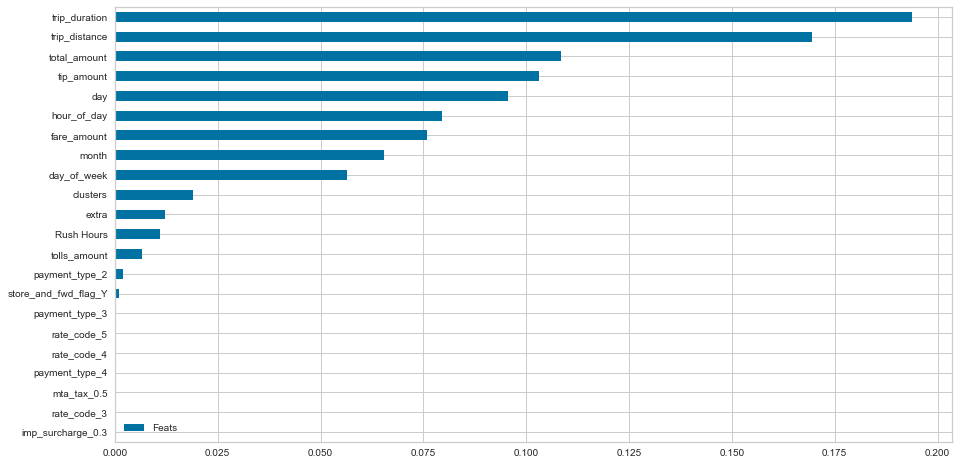

In [236]:
pd.DataFrame(rf.feature_importances_, index = dummytest.columns, columns = ["Feats"]).sort_values(by="Feats").plot(kind="barh") 